In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from multi_arm import Arm, monte_carlo_simulation, k_arm_bandit_mc, plot_history

In [5]:
alphas = np.linspace(0.16, 0.2, 5)
alphas

array([0.16, 0.17, 0.18, 0.19, 0.2 ])

In [6]:
start = time()

ctrs = [0.04, 0.05]
true_winner_idx = np.argmax(ctrs)
n_trials = 100

avg_traffic = []
success_probs = []
for alpha in alphas:
    cols = ["winner_idx", "wins", "traffic"]
    df = pd.DataFrame(columns=cols)

    for i in range(n_trials):
        winner_idx, _, wins, traffic, _, _, _, _, _, _ = k_arm_bandit_mc(ctrs=ctrs, burn_in=1400, draw=1000, alpha=alpha, silent=True)
        df = df.append({key : val for key, val in zip(cols, [winner_idx, sum(wins), sum(traffic)])}, ignore_index=True)

        success_rate = 100 * sum(df.winner_idx == true_winner_idx) / len(df)
        print("alpha %.2f, progress %.2f%%, success rate %.2f%%..."
              %(alpha, 100 * (i + 1) / n_trials, success_rate), end="\r")
    
    avg_traffic.append(df.traffic.mean())
    success_probs.append(success_rate)
    print("alpha %.2f, average traffic %.2f, probability of finding winner: %.2f%%"
          %(alpha, df.traffic.mean(), success_rate))
    
    df["conversion"] = df.wins / df.traffic
    df.to_csv("outputs/df_bandit_alpha_%.2f.csv"%alpha)

end = time()
print("time elapsed: %.2fs"%(end - start))

alpha 0.16, average traffic 1813.35, probability of finding winner: 83.00%
alpha 0.17, average traffic 1894.57, probability of finding winner: 81.00%
alpha 0.18, average traffic 1804.86, probability of finding winner: 81.00%
alpha 0.19, average traffic 1769.25, probability of finding winner: 81.00%
alpha 0.20, average traffic 1628.88, probability of finding winner: 78.00%
time elapsed: 556.68s


In [10]:
df = pd.DataFrame({"alpha" : alphas,
                   "avg_traffic" : avg_traffic, 
                   "success_prob" : success_probs})
df.to_csv("outputs/alpha_search_%.2f-%.2f.csv"%(alphas[0], alphas[-1]), index=None)

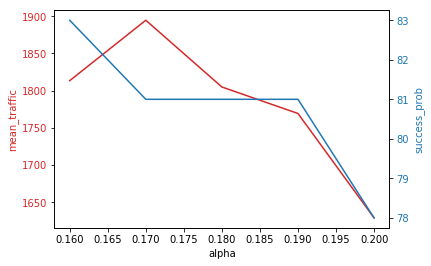

In [11]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(df.alpha, df.avg_traffic, color=color)
ax1.set_xlabel('alpha')
ax1.set_ylabel('mean_traffic', color=color)
ax1.tick_params(axis='y', labelcolor=color)

color = 'tab:blue'
ax2 = plt.twinx()
ax2.plot(df.alpha, df.success_prob, color=color)
ax2.set_ylabel('success_prob', color=color)
ax2.tick_params(axis='y', labelcolor=color)